# Modelo Black Scholes y comparaciones con el mercado

In [1]:
import math
import numpy as np
from scipy.stats import norm
import sys
sys.path.append('..')
from Codigo.opcion_europea_bs import opcion_europea_bs
from Codigo.opcion_americana_bin import opcion_americana_bin
from Codigo.opcion_europea_bin import opcion_europea_bin
from Codigo.opcion_europea_bin_c import opcion_europea_bin_c



Def
    Calculador del precio de una opcion Europea con el modelo de Black Scholes
Inputs
    - tipo : string - Tipo de contrato entre ["CALL","PUT"]
    - S : float - Spot price del activo
    - K : float - Strike price del contrato
    - T : float - Tiempo hasta la expiracion (en años)
    - r : float - Tasa 'libre de riesgo' (anualizada)
    - sigma : float - Volatilidad implicita (anualizada)
    - div : float - Tasa de dividendos continuos (anualizada)
Outputs
    - precio_BS: float - Precio del contrato

In [2]:
tipo = "CALL"
S = 100
K = 100
T = 1
r = 0.05
sigma =0.25
div = 0

In [3]:
#Defino los ds
d1 = (math.log(S / K) + (r - div + 0.5 * sigma * sigma) * T) / sigma / math.sqrt(T)
d2 = (math.log(S / K) + (r - div - 0.5 * sigma * sigma) * T) / sigma / math.sqrt(T)

print(d1)
print(d2)

0.325
0.07500000000000001


In [4]:
if tipo == "CALL":
    precio_BS = math.exp(-div*T) *S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
elif tipo == "PUT":
    precio_BS = K * math.exp(-r * T) * norm.cdf(-d2) - math.exp(-div*T) * S * norm.cdf(-d1)

In [5]:
precio_BS

12.335998930368717

## Comparacion con el modelo Binomial

In [6]:
pasos = 5000
precio_bin = opcion_europea_bin(tipo, S, K, T, r, sigma, div,pasos)
precio_bs = opcion_europea_bs(tipo, S, K, T, r, sigma, div)

print("Precio de Black Scholes : ", precio_bs)
print("Precio Modelo Binomial  : ", precio_bin)

Precio de Black Scholes :  12.335998930368717
Precio Modelo Binomial  :  12.33550453323051


# Modelo Black Scholes y comparaciones con el mercado

In [7]:
from Codigo.data_nyse import obtener_panel_opciones_nyse
from Codigo.data_nyse import obtener_opciones_yahoo_finance


In [8]:
ticker = 'FB'
panel_nyse = obtener_panel_opciones_nyse(ticker,True)

In [9]:
panel_nyse

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,impliedVolatility,Ask,Bid
0,FB200807C00110000,FB,249.33,C,110.0,1,143.80,2.266636,5.542972,139.70,138.45
1,FB200807C00115000,FB,249.33,C,115.0,1,138.70,2.168087,5.269535,134.70,133.45
907,FB200807P00115000,FB,249.33,P,115.0,1,0.06,2.168087,3.718751,0.07,0.00
2,FB200807C00120000,FB,249.33,C,120.0,1,132.80,2.077750,5.005863,129.70,128.45
908,FB200807P00120000,FB,249.33,P,120.0,1,0.10,2.077750,3.843750,0.16,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1788,FB220916P00350000,FB,249.33,P,350.0,771,120.00,0.712371,0.348273,122.85,118.75
905,FB220916C00360000,FB,249.33,C,360.0,771,20.68,0.692583,0.361396,22.05,19.45
1789,FB220916P00360000,FB,249.33,P,360.0,771,128.00,0.692583,0.346778,130.95,126.35
906,FB220916C00370000,FB,249.33,C,370.0,771,19.49,0.673865,0.361106,20.40,17.75


### Panel con datos necesarios para pricear

In [10]:
# tasa de descuento
# dividendos

import yfinance as yf

data = yf.Ticker(ticker)


In [11]:
data.info
#chequear informacion de dividendos

{'zip': '94025',
 'sector': 'Communication Services',
 'fullTimeEmployees': 52534,
 'longBusinessSummary': "Facebook, Inc. develops products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality headsets, and in-home devices worldwide. The company's products include Facebook that enables people to connect, share, discover, and communicate with each other on mobile devices and personal computers; Instagram, a community for sharing photos, videos, and private messages; Messenger, a messaging application for people to connect with friends, family, groups, and businesses across platforms and devices; and WhatsApp, a messaging application that is used by people and businesses to communicate in a private way. It also provides Oculus, a hardware, software, and developer ecosystem, which allows people to come together and connect with each other through its Oculus virtual reality products. Facebook, Inc. was founded in 2004 

In [12]:
try:
    div = float(data.info['dividendYield'])
except:
    div = 0.0

In [13]:
div

0.0

### Curva de tasas (ad-hoc, poco robusta)

In [14]:
#Libor
#https://es.global-rates.com/tipos-de-interes/libor/dolar-usa/dolar-usa.aspx
#Ad hoc curve de tasas:


Dias = np.array([1, 7, 30, 60, 91, 182, 365])

Tasas = np.array([0.0008725,
                 0.0010675,
                 0.0015488,
                 0.0019613,
                 0.0024875,
                 0.0030613,
                 0.0044863])

curva = np.vstack((Dias, Tasas)).T

from scipy import interpolate
curva_interp = interpolate.interp1d(Dias, Tasas, fill_value='extrapolate')

panel_nyse['Tasa'] = curva_interp(panel_nyse.TTM)


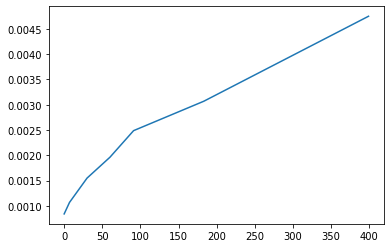

In [15]:
curva_interp(50)
tasas = np.zeros(400)
days = np.zeros(400)
for day in range(400):
    days[day]=day
    tasas[day] = curva_interp(day)
    
from matplotlib import pyplot as plt

plt.plot(days,tasas)

In [16]:

panel_nyse['Avg'] = (panel_nyse.Bid+panel_nyse.Ask)/2


panel_nyse = panel_nyse[panel_nyse.TTM>0]
panel_nyse = panel_nyse[panel_nyse.impliedVolatility>0]

panel_nyse = panel_nyse[['Especie', 'Ticker', 'Spot', 'Moneyness','CallPut', 'Strike', 'TTM',  'impliedVolatility','Last', 'Bid','Ask','Avg', 'Tasa']]
panel_nyse['Precio_BS'] = 0.0
panel_nyse['Precio_BIN'] = 0.0


In [17]:
panel_nyse

,Especie,Ticker,Spot,Moneyness,CallPut,Strike,TTM,impliedVolatility,Last,Bid,Ask,Avg,Tasa,Precio_BS,Precio_BIN
0,FB200807C00110000,FB,249.33,2.266636,C,110.0,1,5.542972,143.80,138.45,139.70,139.075,0.000873,0.0,0.0
1,FB200807C00115000,FB,249.33,2.168087,C,115.0,1,5.269535,138.70,133.45,134.70,134.075,0.000873,0.0,0.0
907,FB200807P00115000,FB,249.33,2.168087,P,115.0,1,3.718751,0.06,0.00,0.07,0.035,0.000873,0.0,0.0
2,FB200807C00120000,FB,249.33,2.077750,C,120.0,1,5.005863,132.80,128.45,129.70,129.075,0.000873,0.0,0.0
908,FB200807P00120000,FB,249.33,2.077750,P,120.0,1,3.843750,0.10,0.00,0.16,0.080,0.000873,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,FB220916P00350000,FB,249.33,0.712371,P,350.0,771,0.348273,120.00,118.75,122.85,120.800,0.007648,0.0,0.0
905,FB220916C00360000,FB,249.33,0.692583,C,360.0,771,0.361396,20.68,19.45,22.05,20.750,0.007648,0.0,0.0
1789,FB220916P00360000,FB,249.33,0.692583,P,360.0,771,0.346778,128.00,126.35,130.95,128.650,0.007648,0.0,0.0
906,FB220916C00370000,FB,249.33,0.673865,C,370.0,771,0.361106,19.49,17.75,20.40,19.075,0.007648,0.0,0.0


In [18]:
for index in range(len(panel_nyse.index)):
    if panel_nyse.CallPut.values[index] == "C":
        tipo =  "CALL"
    elif panel_nyse.CallPut.values[index] == "P":
        tipo =  "PUT"
    S = panel_nyse.Spot.values[index] 
    K = panel_nyse.Strike.values[index]
    T = panel_nyse.TTM.values[index]/365
    r = panel_nyse.Tasa.values[index]
    sigma = panel_nyse.impliedVolatility.values[index]
    
    panel_nyse.Precio_BS.values[index] = opcion_europea_bs(tipo, S, K, T, r, sigma, div)
    panel_nyse.Precio_BIN.values[index] = opcion_americana_bin(tipo, S, K, T, r, sigma, div, 200)
        

In [19]:
panel_nyse.head(25)

,Especie,Ticker,Spot,Moneyness,CallPut,Strike,TTM,impliedVolatility,Last,Bid,Ask,Avg,Tasa,Precio_BS,Precio_BIN
0,FB200807C00110000,FB,249.33,2.266636,C,110.0,1,5.542972,143.80,138.45,139.70,139.075,0.000873,139.364096,139.362690
1,FB200807C00115000,FB,249.33,2.168087,C,115.0,1,5.269535,138.70,133.45,134.70,134.075,0.000873,134.364874,134.363772
907,FB200807P00115000,FB,249.33,2.168087,P,115.0,1,3.718751,0.06,0.00,0.07,0.035,0.000873,0.000261,0.000228
2,FB200807C00120000,FB,249.33,2.077750,C,120.0,1,5.005863,132.80,128.45,129.70,129.075,0.000873,129.365582,129.364692
908,FB200807P00120000,FB,249.33,2.077750,P,120.0,1,3.843750,0.10,0.00,0.16,0.080,0.000873,0.001175,0.001092
909,FB200807P00130000,FB,249.33,1.917923,P,130.0,1,2.937503,0.01,0.00,0.03,0.015,0.000873,0.000068,0.000057
910,FB200807P00135000,FB,249.33,1.846889,P,135.0,1,2.500004,0.01,0.00,0.01,0.005,0.000873,0.000007,0.000005
911,FB200807P00140000,FB,249.33,1.780929,P,140.0,1,2.375004,0.01,0.00,0.01,0.005,0.000873,0.000008,0.000006
3,FB200807C00145000,FB,249.33,1.719517,C,145.0,1,3.832032,96.80,103.45,104.70,104.075,0.000873,104.370287,104.368946
912,FB200807P00145000,FB,249.33,1.719517,P,145.0,1,2.250004,0.01,0.00,0.01,0.005,0.000873,0.000009,0.000008


### Elijo un maturity y un tipo de opcion y grafico

In [20]:
TTMs = list(set(panel_nyse.TTM.values))
TTMs.sort()
from matplotlib import pyplot as plt

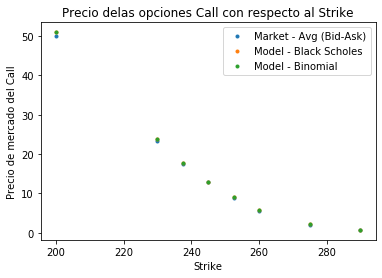

In [21]:
CP = "C"

TTM = TTMs[5]

Ks = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Strike.values
#precios_last = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Last.values
precios_avg = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Avg.values
precios_BS = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Precio_BS.values
precios_BIN = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Precio_BIN.values
    
space = 3
    
#plt.plot(Ks[0::space], precios_last[0::space], '.', label = 'Market - Last')
plt.plot(Ks[0::space], precios_avg[0::space], '.',label = 'Market - Avg (Bid-Ask)')
plt.plot(Ks[0::space], precios_BS[0::space], '.',label = 'Model - Black Scholes')
plt.plot(Ks[0::space], precios_BIN[0::space], '.',label = 'Model - Binomial')


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio delas opciones Call con respecto al Strike')
    
plt.show()

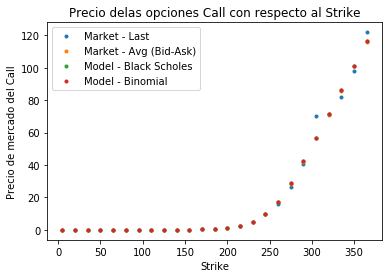

In [22]:

CP = "P"

TTM = TTMs[-10]

Ks = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Strike.values
precios_last = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Last.values
precios_avg = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Avg.values
precios_BS = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Precio_BS.values
precios_BIN = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Precio_BIN.values
    
space = 3
    
plt.plot(Ks[0::space], precios_last[0::space], '.', label = 'Market - Last')
plt.plot(Ks[0::space], precios_avg[0::space], '.',label = 'Market - Avg (Bid-Ask)')
plt.plot(Ks[0::space], precios_BS[0::space], '.',label = 'Model - Black Scholes')
plt.plot(Ks[0::space], precios_BIN[0::space], '.',label = 'Model - Binomial')


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio delas opciones Call con respecto al Strike')
    
plt.show()

In [23]:
#Me genero un dataframe con fiferencias entre mercado y modelos

CP = "C"
diff_df = panel_nyse[(panel_nyse.TTM == TTMs[15] ) & (panel_nyse.CallPut == CP)][['Avg','Precio_BS','Precio_BIN']]

diff_df['AvgVSBS'] = diff_df.Avg-diff_df.Precio_BS
diff_df['AvgVSBIN'] = diff_df.Avg-diff_df.Precio_BIN

diff_df['Rel_AvgVSBS'] = abs(diff_df.AvgVSBS)/diff_df.Avg * 100
diff_df['Rel_AvgVSBIN'] = abs(diff_df.AvgVSBIN)/diff_df.Avg * 100

diff_df = diff_df[abs(diff_df.Avg)>0.0]

In [24]:
diff_df

,Avg,Precio_BS,Precio_BIN,AvgVSBS,AvgVSBIN,Rel_AvgVSBS,Rel_AvgVSBIN
858,144.875,148.719961,148.717441,-3.844961,-3.842441,2.653985,2.652246
859,140.650,144.363165,144.381643,-3.713165,-3.731643,2.640004,2.653141
860,136.650,140.394449,140.388698,-3.744449,-3.738698,2.740175,2.735966
861,115.150,126.333104,124.319958,-11.183104,-9.169958,9.711771,7.963489
862,128.300,132.257934,132.280839,-3.957934,-3.980839,3.084906,3.102758
863,124.300,128.285906,128.300517,-3.985906,-4.000517,3.206682,3.218437
864,120.300,124.265075,124.223365,-3.965075,-3.923365,3.295989,3.261317
865,116.400,120.534336,120.551738,-4.134336,-4.151738,3.551835,3.566785
866,112.850,116.899939,116.930334,-4.049939,-4.080334,3.588780,3.615715
867,94.450,98.570902,98.572652,-4.120902,-4.122652,4.363052,4.364904


In [25]:
print(diff_df.mean(axis=0))

Avg             68.317347
Precio_BS       71.851152
Precio_BIN      71.822422
AvgVSBS         -3.533805
AvgVSBIN        -3.505075
Rel_AvgVSBS      6.291332
Rel_AvgVSBIN     6.281699
dtype: float64


In [26]:
panel_nyse.to_csv('Clase4_panel_nyse_modelos.csv')